# Peng Jin

## Research Questions
- Do teams that do well in offense also do well in defense?
- Which teams receive highest expectation?
- Does the expectation ranking match the team's Win Above Replacement score?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Task 1

In [4]:
df = pd.read_csv("../data/raw/latest_RAPTOR_by_team.csv")
print("Number of rows and columns respectively:", df.shape)
print(df.head())
print("Columns:", df.columns)

Number of rows and columns respectively: (865, 23)
        player_name  player_id  season season_type team  poss    mp  \
0  Precious Achiuwa  achiupr01    2021          PO  MIA    24    12   
1  Precious Achiuwa  achiupr01    2021          RS  MIA  1557   737   
2      Jaylen Adams  adamsja01    2021          RS  MIL    41    18   
3      Steven Adams  adamsst01    2021          RS  NOP  3313  1605   
4       Bam Adebayo  adebaba01    2021          PO  MIA   293   136   

   raptor_box_offense  raptor_box_defense  raptor_box_total  ...  \
0          -20.130150           13.445869         -6.684281  ...   
1           -3.876227            1.172972         -2.703254  ...   
2          -13.078112           -3.298021        -16.376133  ...   
3           -1.463698            2.084763          0.621065  ...   
4           -4.199527           -0.745652         -4.945179  ...   

   raptor_offense  raptor_defense  raptor_total  war_total  war_reg_season  \
0      -19.524216       16.885365  

In [5]:
df.nunique(axis=0)

player_name             540
player_id               540
season                    1
season_type               2
team                     30
poss                    721
mp                      621
raptor_box_offense      865
raptor_box_defense      865
raptor_box_total        865
raptor_onoff_offense    864
raptor_onoff_defense    865
raptor_onoff_total      865
raptor_offense          865
raptor_defense          865
raptor_total            865
war_total               865
war_reg_season          627
war_playoffs            240
predator_offense        865
predator_defense        865
predator_total          865
pace_impact             865
dtype: int64

In [11]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
raptor_box_offense,865.0,-1.190280,5.029161,-46.708724,-2.690118,-0.878361,1.052860,25.867967
raptor_box_defense,865.0,-0.452295,5.073575,-25.382776,-2.244035,-0.334633,1.589149,66.957703
raptor_box_total,865.0,-1.642575,7.526838,-62.219863,-4.002939,-0.802503,1.754482,67.932330
raptor_onoff_offense,865.0,-2.544279,8.402711,-69.051553,-5.120859,-1.362247,1.629285,28.120957
raptor_onoff_defense,865.0,1.036961,8.677396,-52.889719,-2.148888,0.351031,3.185249,65.729833
raptor_onoff_total,865.0,-1.507318,10.583814,-88.047853,-5.202733,-0.874476,2.719564,55.960874
raptor_offense,865.0,-1.553084,5.329365,-43.366145,-3.123756,-0.982071,0.925080,22.564146
raptor_defense,865.0,-0.165898,5.397463,-30.938383,-2.091871,-0.131748,1.899592,71.024801
raptor_total,865.0,-1.718982,7.758748,-63.749646,-4.267638,-0.947591,1.790902,68.268286
war_total,865.0,0.963499,1.963746,-4.747338,-0.085045,0.219487,1.480337,15.756031


In [7]:
df.team.unique()

array(['MIA', 'MIL', 'NOP', 'SAS', 'BRK', 'PHO', 'MEM', 'CLE', 'CHI',
       'ORL', 'LAL', 'POR', 'TOR', 'HOU', 'WAS', 'UTA', 'SAC', 'CHA',
       'NYK', 'DEN', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND',
       'ATL', 'PHI', 'BOS'], dtype=object)

## Task 2-3

In [9]:
import project_functions3 as fun

In [10]:
df_cleaned=fun.load_and_process("../data/raw/latest_RAPTOR_by_team.csv")
df_cleaned

(         player_name  player_id  season season_type team  poss    mp  \
 0       Aaron Gordon  gordoaa01    2021          RS  ORL  1528   736   
 1       Aaron Gordon  gordoaa01    2021          PO  DEN   620   299   
 2       Aaron Gordon  gordoaa01    2021          RS  DEN  1341   648   
 3      Aaron Holiday  holidaa01    2021          RS  IND  2556  1176   
 4      Aaron Nesmith  nesmiaa01    2021          PO  BOS   152    75   
 ..               ...        ...     ...         ...  ...   ...   ...   
 860    Yuta Watanabe  watanyu01    2021          RS  TOR  1533   723   
 861      Zach LaVine  lavinza01    2021          RS  CHI  4294  2034   
 862       Zeke Nnaji  nnajize01    2021          RS  DEN   848   397   
 863       Zeke Nnaji  nnajize01    2021          PO  DEN    39    18   
 864  Zion Williamson  willizi01    2021          RS  NOP  4360  2026   
 
      raptor_box_offense  raptor_box_defense  raptor_box_total  ...  \
 0             -0.932025            1.821116       

df_cleaned.shape has the same result as df.shape. No rows and columns are dropped.

## Task 4

#### Graph Analysis 1

The following graph shows the generally negative correlation between the individual player's offense and defense, in both onoff and box.
It also shows that the player's box offense and defense capability has a large correlation with their total rating on offense and defense.

<AxesSubplot:>

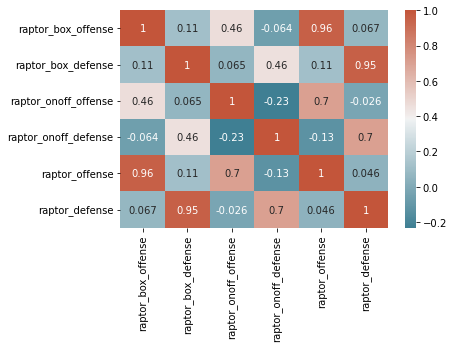

In [12]:
df1= df.loc[0:,['raptor_box_offense', 'raptor_box_defense', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_offense', 'raptor_defense']]
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Graph Analysis 2

The following graph shows that most teams have negative predictive points in total. But teams MEM and CHI are given high expectation.

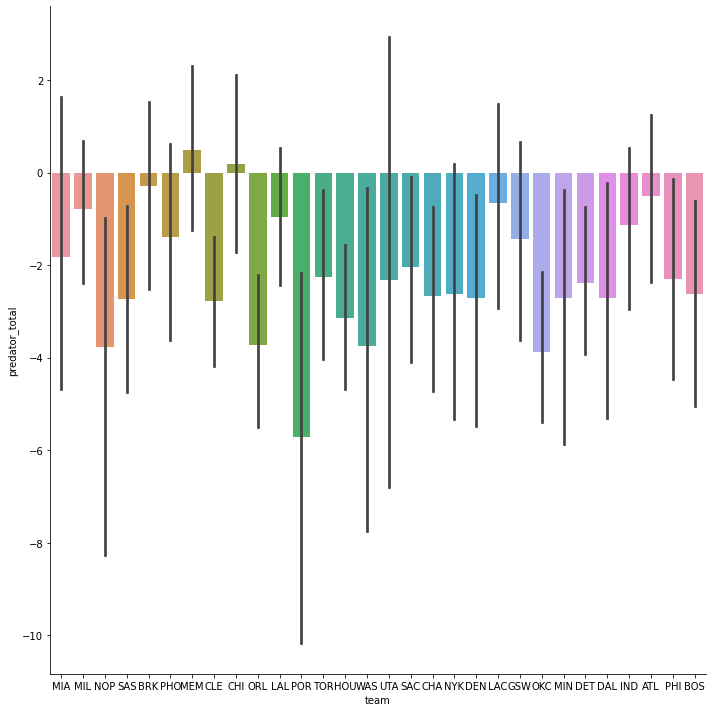

In [13]:
#df.plot(kind="scatter", x="team", y="predator_total")
sns.catplot(x="team",y="predator_total",data = df,kind ="bar",height=10)

#### Graph Analysis 3

The following graph shows that the team PHO has the highest "Win Above Replacement" points, which indicates that PHO's competitiveness. However, the team GSW has the largest range of "Win Above Replacement" points, which indicates large within-team gap in capabilities of players.

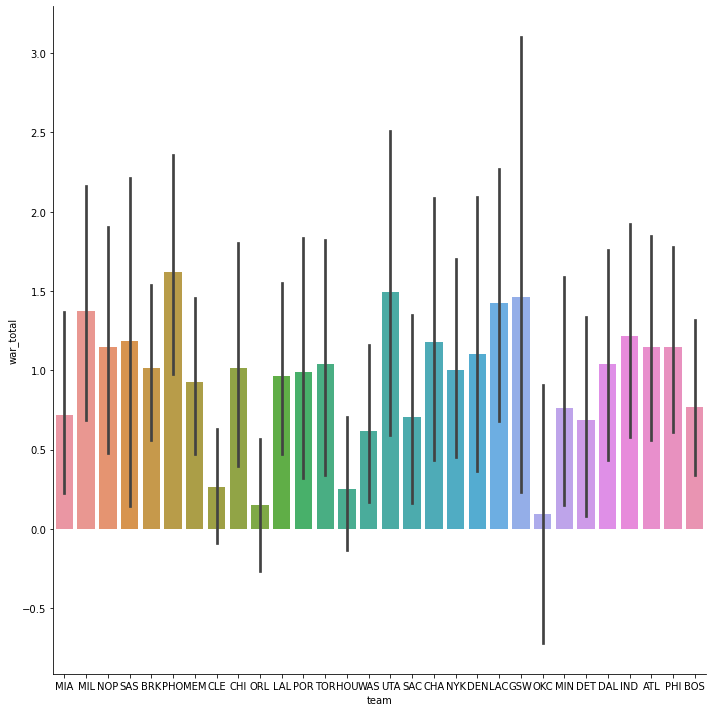

In [14]:
sns.catplot(x="team",y="war_total",data = df,kind ="bar",height=10)

### Conclusions on Graph Analysis

By comparing graph 2 and graph 3, we find that teams that receive highest expectation are not the same as teams with highest total Win Above Replacement scores (in other words, most competitive teams). Taking Graph 1 into consideration, the reasons behind this could be team cooperation and drawbacks on either offense or defense, which would be further analyzed.